# 1. Data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np

filename = 'CanadaData/wells_canada.csv' # nome do dado de entrada
df = pd.read_csv(filename) # leitura do dado de entrada

filenameLoc = 'CanadaData//MannvilleWells_LatLong.csv' # nome do dado de entrada
dfLoc = pd.read_csv(filenameLoc) # leitura do dado de entrada
#df.replace(0, np.nan, inplace=True)

In [2]:
# selecting the wells which will trained
training_num_wells = 71
wells_location = dfLoc[len(dfLoc)-training_num_wells:len(dfLoc)].copy()

In [3]:
# function to see where is the wells location
def WellLoc(data):
    mean_lat = data['lat'].mean()
    mean_long = data['lng'].mean()
    
    m = folium.Map(location=[mean_lat, mean_long], tiles="OpenStreetMap", zoom_start=7, control_scale=True)
    for index, well_location in data.iterrows():
        folium.Marker([well_location['lat'], well_location['lng']],
                      popup= well_location['SitID']).add_to(m)
    return m

## 1.1 Training well location

In [4]:
WellLoc(wells_location)

In [5]:
wells_location.reset_index(inplace=True)

## 1.2 Blind and training well location

In [6]:
# selecting the wells which will trained
#num_wells = len(dfLoc)
#blind_wells_location = dfLoc[len(dfLoc)-num_wells:len(dfLoc)-training_num_wells].copy()
#WellLoc(blind_wells_location)

In [7]:
# Function to rename a full column, suitable for when we want to transform the names of the wells into a string.
# data = data frame
# feaature_name = feature name
def RenameFeatures(data, feaature_name):
    
    for i in range(0,len(data[feaature_name])):

        data[feaature_name][i] = 'well-' + "{}".format(data[feaature_name][i])

In [8]:
RenameFeatures(dfLoc, 'SitID')

/tmp/ipykernel_4979/2593835937.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feaature_name][i] = 'well-' + "{}".format(data[feaature_name][i])


In [9]:
blindWellame = ['well-125562','well-124862','well-123528','well-122293','well-121444','well-118629',
                'well-154815','well-116458','well-114847','well-113074']

blind_location = []
for name in blindWellame:
    
    blind_location.append(dfLoc[dfLoc['SitID'] == name]) #seleciona um poço apenas do dado
blind_location = pd.concat(blind_location)

In [10]:
TBLocation = pd.concat([wells_location,blind_location])

In [11]:
WellLoc(TBLocation)

In [12]:
RenameFeatures(wells_location, 'SitID')
RenameFeatures(df, 'WELL')

/tmp/ipykernel_4979/2593835937.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feaature_name][i] = 'well-' + "{}".format(data[feaature_name][i])


## 1.3 Selecting the training data

In [13]:
training_data = []

for string in wells_location['SitID']:
    
    #print(string)
    training_data.append(df[df['WELL'] == string])

training_data = pd.concat(training_data)
display(training_data)

,WELL,DEPTH,FACIES,W_TAR,SW,VSH,PHI,RW
467258,well-125565,130.24,4,0.000,1.000,0.529,0.179,0.848
467259,well-125565,130.49,4,0.000,1.000,0.553,0.170,0.848
467260,well-125565,130.74,4,0.004,0.931,0.655,0.131,0.848
467261,well-125565,130.99,4,0.020,0.619,0.668,0.126,0.848
467262,well-125565,131.24,4,0.024,0.548,0.657,0.130,0.848
...,...,...,...,...,...,...,...,...
484916,well-126244,584.00,5,0.000,1.000,1.000,0.000,1.433
484917,well-126244,584.25,5,0.000,1.000,0.999,0.000,1.433
484918,well-126244,584.50,5,0.000,1.000,0.980,0.000,1.433
484919,well-126244,584.75,5,0.000,1.000,0.981,0.000,1.432


In [14]:
# List the number of wells

soma = 0
for well in training_data['WELL'].unique():
    soma = soma + 1

print(soma, 'wells selected.')

70 wells selected.


## 1.4 Selecting the blind data

In [15]:
blind_data = []

for string in blindWellame:
    
    #print(string)
    blind_data.append(df[df['WELL'] == string])

blind_data = pd.concat(blind_data)
display(blind_data)

,WELL,DEPTH,FACIES,W_TAR,SW,VSH,PHI,RW
466668,well-125562,140.00,5,0.000,1.00,0.982,0.000,0.644
466669,well-125562,140.25,5,0.000,1.00,1.000,0.000,0.644
466670,well-125562,140.50,5,0.000,1.00,1.000,0.000,0.644
466671,well-125562,140.75,5,0.000,1.00,1.000,0.000,0.643
466672,well-125562,141.00,5,0.000,1.00,1.000,0.000,0.643
...,...,...,...,...,...,...,...,...
299949,well-113074,364.00,1,0.000,1.00,0.136,0.208,0.917
299950,well-113074,364.25,1,0.000,1.00,0.136,0.183,0.917
299951,well-113074,364.50,1,0.000,1.00,0.136,0.203,0.917
299952,well-113074,364.75,1,0.002,0.98,0.136,0.225,0.917


In [16]:
# List the number of wells

soma = 0
for well in blind_data['WELL'].unique():
    soma = soma + 1

print(soma, 'blind wells selected.')

10 blind wells selected.


In [17]:
# indata to use 
df = training_data[['WELL', 'DEPTH', 'FACIES', 'SW', 'VSH', 'PHI', 'RW', 'W_TAR']].copy()

In [18]:
# List of headers
plot_cols = ['WELL', 'DEPTH', 'FACIES', 'SW', 'VSH', 'PHI', 'RW', 'W_TAR']

In [19]:
df = df[plot_cols].copy()

In [20]:
data_nan = df.copy()

In [21]:
for num, col in enumerate(data_nan.columns[2:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col].replace(0, num, inplace=True)
    print(col, num) #Print out the col name and number to verify it works

FACIES 0
SW 1
VSH 2
PHI 3
RW 4
W_TAR 5


In [22]:
data_nan.describe()

,DEPTH,FACIES,SW,VSH,PHI,RW,W_TAR
count,18195.000000,18195.0,18195.0,18195.0,18195.0,18195.0,18195.0
mean,329.301825,1.0,2.0,3.0,4.0,5.0,6.0
std,217.470010,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,1.0,2.0,3.0,4.0,5.0,6.0
25%,64.240000,1.0,2.0,3.0,4.0,5.0,6.0
50%,447.000000,1.0,2.0,3.0,4.0,5.0,6.0
75%,520.235000,1.0,2.0,3.0,4.0,5.0,6.0
max,660.000000,1.0,2.0,3.0,4.0,5.0,6.0


# 2. Plotting the Data with and without NaN

In [23]:
grouped = data_nan.groupby('WELL')

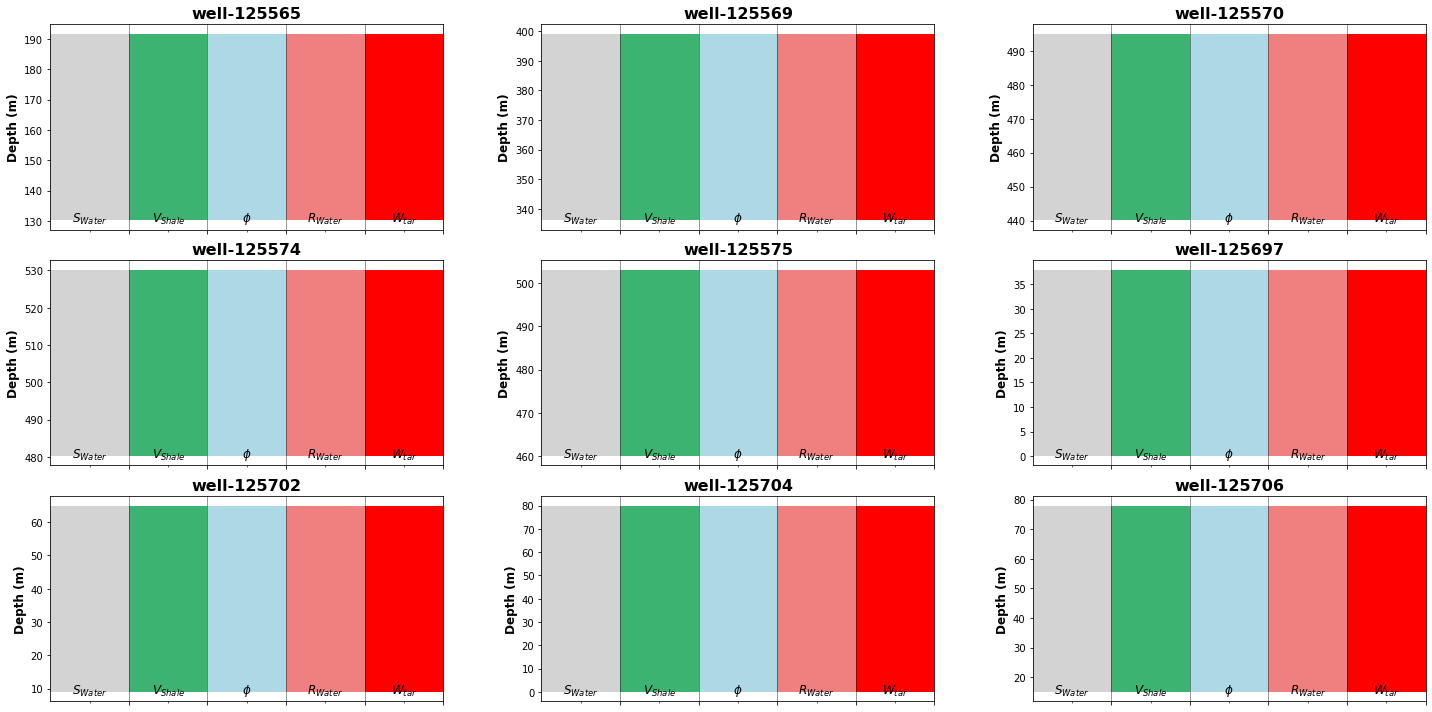

In [24]:
#Setup the labels we want to display on the x-axis

labels = ['$S_{Water}$', '$V_{Shale}$', '$\phi$', '$R_{Water}$', '$W_{tar}$']

#Setup the figure and the subplots
fig, axs = plt.subplots(3, 3, figsize=(20,10))

#Loop through each well and column in the grouped dataframe
for (name, df), ax in zip(grouped, axs.flat):
    #ax.set_xlim(0,5) # 6 features
    ax.set_xlim(0,5) # 6 features
    #Setup the depth range
    #ax.set_ylim(700, 0)
    
    #Create multiple fill betweens for each curve# This is between
    # the number representing null values and the number representing
    # actual values
    
    #ax.fill_betweenx(df.DEPTH, 0, df.W_TAR, facecolor='grey')
    ax.fill_betweenx(df.DEPTH, 0, df.SW, facecolor='lightgrey')
    ax.fill_betweenx(df.DEPTH, 1, df.VSH, facecolor='mediumseagreen')
    ax.fill_betweenx(df.DEPTH, 2, df.PHI, facecolor='lightblue')
    ax.fill_betweenx(df.DEPTH, 3, df.RW, facecolor='lightcoral')
    ax.fill_betweenx(df.DEPTH, 4, df.W_TAR, facecolor='red')

    
    #Setup the grid, axis labels and ticks
    ax.grid(axis='x', alpha=0.5, color='black')
    ax.set_ylabel('Depth (m)', fontsize=12, fontweight='bold')
    #ax.set_yticklabels(["400","","" ,r"550","","", "700"],size=14)
    
    
    #Position vertical lines at the boundaries between the bars
    ax.set_xticks([1,2,3,4,5], minor=False)
    
    #Position the curve names in the centre of each column
    ax.set_xticks([0.5, 1.5 ,2.5 ,3.5, 4.5], minor=True)
    
    #Setup the x-axis tick labels
    ax.set_xticklabels(labels, fontsize=12, minor=True, verticalalignment='bottom')
    ax.set_xticklabels('', minor=False)
    ax.tick_params(axis='x', which='minor', pad=-5)
    
    #Assign the well name as the title to each subplot
    ax.set_title(name, fontsize=16, fontweight='bold')

plt.savefig('canada_missingdata.pdf',bbox_inches='tight')
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.25)
plt.show()


# 4. Column Remapping / Renaming

In [25]:
lithology_numbers = {0: 'Undefined',
                     1: 'Sand', 
                     2: 'ShalySand',
                     3: 'SandyShale', 
                     4: 'Shale',
                     5: 'Coal', 
                     6: 'CementedSand'}

In [26]:
training_data['LITH'] = training_data['FACIES'].map(lithology_numbers)
blind_data['LITH'] = blind_data['FACIES'].map(lithology_numbers)

In [27]:
training_data.rename(columns={'FACIES':'LITH_SI'}, inplace=True)
blind_data.rename(columns={'FACIES':'LITH_SI'}, inplace=True)

# 5. View the number of samples of the whole data

1    7157
2    4074
3      27
4    3102
5    3827
6       8
Name: LITH_SI, dtype: int64


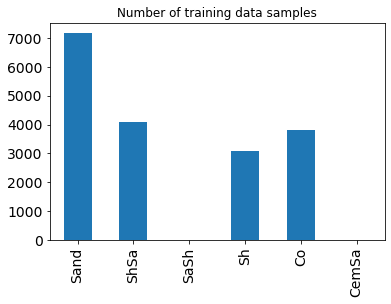

In [28]:
#plot the count of Facies
training_features = ['Sand','ShSa','SaSh','Sh','Co','CemSa']

training_data['LITH_SI'].value_counts().sort_index().plot(kind='bar')
print(training_data['LITH_SI'].value_counts().sort_index())
X_ind = np.arange(0,6,1)
plt.title('Number of training data samples')
plt.xticks(X_ind,training_features)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('canada_number_training_samples.pdf',bbox_inches='tight')
plt.show()

0       7
1    1031
2     519
3       6
4     510
5     618
6       6
Name: LITH_SI, dtype: int64


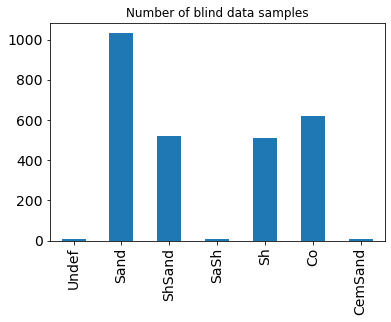

In [29]:
#plot the count of blind Facies

blind_features = ['Undef','Sand','ShSand','SaSh','Sh','Co','CemSand']

blind_data['LITH_SI'].value_counts().sort_index().plot(kind='bar')
print(blind_data['LITH_SI'].value_counts().sort_index())
X_ind = np.arange(0,7,1)
plt.title('Number of blind data samples')
plt.xticks(X_ind,blind_features)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('canada_number_blind_samples.pdf',bbox_inches='tight')
plt.show()

# 6. Crossplot RHOB and NPHI (whole training data)

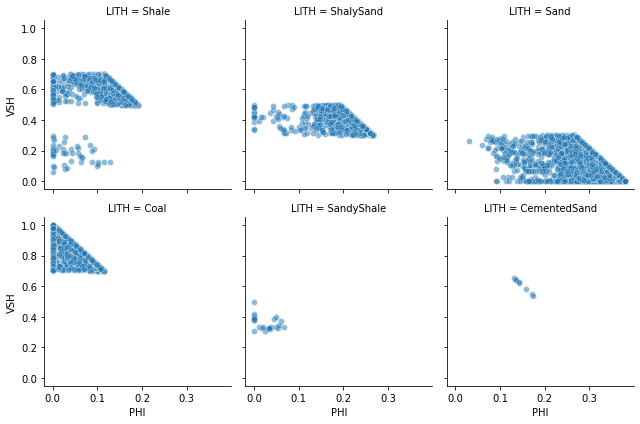

In [30]:
import seaborn as sns

g = sns.FacetGrid(training_data, col='LITH', col_wrap=3)
g.map(sns.scatterplot, 'PHI', 'VSH', alpha=0.5)
#g.set(xlim=(-0.15, 1))
#g.set(ylim=(3, 1))
plt.savefig('canada_cross_plot.pdf',bbox_inches='tight')
plt.show()

# 7. sorting out the blind test well

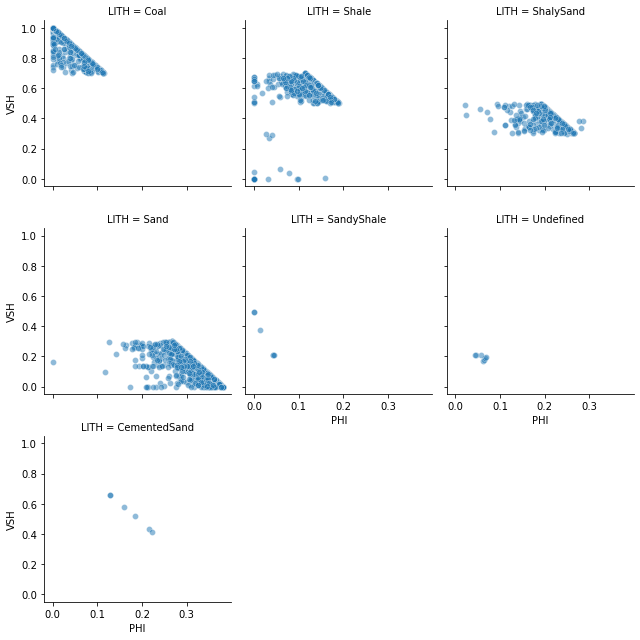

In [31]:
import seaborn as sns

g = sns.FacetGrid(blind_data, col='LITH', col_wrap=3)
g.map(sns.scatterplot, 'PHI', 'VSH', alpha=0.5)
#g.set(xlim=(-0.15, 1))
#g.set(ylim=(3, 1))
plt.show()

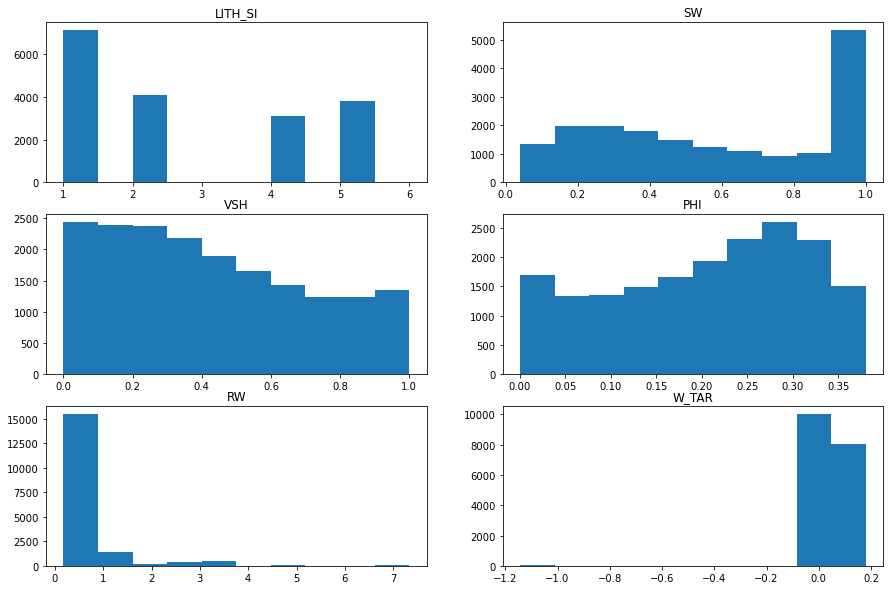

In [32]:
col_list = ['LITH_SI', 'SW', 'VSH', 'PHI', 'RW', 'W_TAR']
plt.figure(figsize=(15,10))
i=0
for col in col_list:
    i+=1
    plt.subplot(3,2,i)
    plt.hist(training_data[col])
    plt.title(col)

plt.savefig('canada_features_chart_values.pdf',bbox_inches='tight')
plt.show()

# 8. Prepare data for modeling and blind test well


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report

In [34]:
features = ['SW', 'VSH', 'PHI', 'RW', 'W_TAR']

y = training_data['LITH_SI']
X = training_data[features]

In [35]:
X.corr()

,SW,VSH,PHI,RW,W_TAR
SW,1.000000,0.536718,-0.557197,0.170097,-0.469931
VSH,0.536718,1.000000,-0.947364,0.131189,-0.336619
PHI,-0.557197,-0.947364,1.000000,-0.130512,0.355544
RW,0.170097,0.131189,-0.130512,1.000000,-0.076525
W_TAR,-0.469931,-0.336619,0.355544,-0.076525,1.000000


In [36]:
# standarization of data for SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [38]:
blind_data_sep = []

for string in blindWellame:
    
    #print(string)
    blind_data_sep.append(blind_data[blind_data['WELL'] == string])

In [39]:
# blind well 6 (example)
#blind_data_sep[1]['LITH_SI']

y_blind = []
X_blind = []
X_blind_stnd = []


for i in range(0,len(blind_data_sep)) :
    
    y_blind.append(blind_data_sep[i]['LITH_SI']) #seleciona um poço apenas do dado
    X_blind.append(blind_data_sep[i][features])
    X_blind_stnd.append(sc.transform(blind_data_sep[i][features]))
    

#
#X_blind_stnd = scaler.transform(X_blind)

# 9. Parameter optimization and classifier training

Modeling algorithms:
1. SVM
2. Gradient boosting
3. Random forest
4. KNN
5. CNN
6. CNN(Kernel RBF)
7. MLP

In [40]:
from sklearn.svm import SVC # To use Support Vector Machine
from sklearn import ensemble # To use Gradient Boosting and Random forest
from sklearn.neighbors import KNeighborsClassifier # To use KNN


### 9.1 SVM: Parameter optimiztion

In [41]:
# c_list = [0.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000]
# gamma_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
# #gamma_list = [0.0001]
# i = 0
# plt.figure(figsize=(15,10))

# for gamma_value in gamma_list:
#     i = i + 1
#     scores = list()
#     score_stds = list()
#     score_tests = list()
#     print('interations gamma_list =',i)
#     j = 0
#     for c_value in c_list:
        
#         j = j + 1
#         print('interations c_list =',j)
        
#         clf_cv = SVC(C=c_value, gamma=gamma_value)
        
#         cv_score = cross_val_score(clf_cv, X_train, y_train)
        
#         scores.append(np.mean(cv_score))
#         score_stds.append(np.std(cv_score))
#         clf_cv.fit(X_train, y_train)
        
#         score_test = clf_cv.score(X_test, y_test)
#         score_tests.append(score_test)
#     #plt.plot(x, y1, "-b", label="sine")
#     plt.subplot(2,3,i)
#     plt.semilogx(c_list, scores, '-b', label='CV-Train')
#     plt.semilogx(c_list, score_tests, '-r', label='CV-Test')
#     #plt.semilogx(c_list, np.array(scores)+np.array(score_stds), 'b--')
#     #plt.semilogx(c_list, np.array(scores)+-np.array(score_stds), 'b--')
#     plt.legend()
#     plt.title('$\gamma$ = {}'.format(gamma_value))
#     plt.xlabel('C values')
#     plt.ylabel('Accuracy')
#     #plt.ylim(0,1.1)
# plt.savefig('canada_optimus_values_svm.pdf',bbox_inches='tight')
# plt.show()

SVM classifier training

In [42]:
clf = SVC(C=100, gamma=1)
clf.fit(X_train, y_train)

SVC(C=100, gamma=1)

In [43]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    

    if normalize:
        
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Sand       0.99      1.00      0.99      3542
        ShSa       0.99      0.98      0.98      2015
        SaSh       0.86      0.86      0.86        14
          Sh       0.98      0.98      0.98      1592
          Co       0.99      1.00      1.00      1933
       CemSa       0.00      0.00      0.00         2

    accuracy                           0.99      9098
   macro avg       0.80      0.80      0.80      9098
weighted avg       0.99      0.99      0.99      9098

Normalized confusion matrix


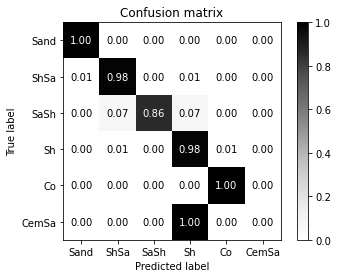

In [44]:
pred_test = clf.predict(X_test)
print(classification_report(y_test, pred_test, target_names=training_features))
cm_test_SVM = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cm_test_SVM, training_features, normalize=True)

In [45]:
microF1_test_SVM = f1_score(y_test, pred_test, average='micro')
print('Test Macro f1 score:', microF1_test_SVM)

Test Macro f1 score: 0.9896680589140471


In [46]:
blind_features = {0: 'Undef',
                  1: 'Sand',
                  2: 'ShSand',
                  3: 'SaSh',
                  4: 'Sh',
                  5: 'Co',
                  6: 'CemSand'}

In [47]:
#plot the count of blind Facies

# blind_features = ['Undef','Sand','ShSand','SaSh','Sh','Co','CemSand']
#blind_features = ['Sand','ShSand','SaSh','Sh','Co']

blind_class =[]
for j in range(1,11):

    #y_blind[j-1].value_counts().sort_index().plot(kind='bar')
    #print(y_blind[j].value_counts().sort_index())
    num_lith = y_blind[j-1].value_counts().sort_index()
    values_index = num_lith.index

    X_ind = np.arange(0,len(y_blind[j-1].value_counts()),1)

    names = []
    for i in values_index:
        names.append(blind_features[i])
    #print(X_ind)    
    blind_class.append(names)


    #plt.savefig('canada_number_blind_samples.pdf',bbox_inches='tight')


In [48]:
blind_class

[['Sand', 'ShSand', 'SaSh', 'Sh', 'Co'],
 ['Sand', 'ShSand', 'Sh', 'Co'],
 ['Undef', 'Sand', 'ShSand', 'SaSh', 'Sh', 'Co'],
 ['Sand', 'ShSand', 'Sh', 'Co', 'CemSand'],
 ['Sand', 'ShSand', 'SaSh', 'Sh', 'Co'],
 ['Sand', 'ShSand', 'Sh', 'Co', 'CemSand'],
 ['Sand', 'ShSand', 'Sh', 'Co'],
 ['Sand', 'ShSand', 'Sh', 'Co'],
 ['Sand', 'ShSand', 'Sh', 'Co'],
 ['Sand', 'ShSand', 'Sh', 'Co']]

              precision    recall  f1-score   support

        Sand       0.98      0.96      0.97       105
      ShSand       0.96      0.92      0.94        74
          Sh       0.93      1.00      0.96        68
          Co       1.00      1.00      1.00        14

    accuracy                           0.96       261
   macro avg       0.97      0.97      0.97       261
weighted avg       0.96      0.96      0.96       261

Normalized confusion matrix


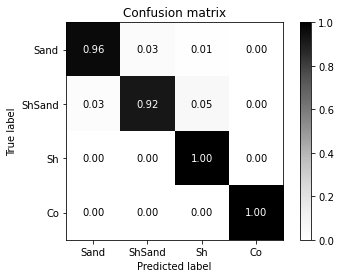

In [49]:
k = 9

pred_blind = clf.predict(X_blind_stnd[k])
print(classification_report(y_blind[k], pred_blind, target_names=blind_class[k]))
cm_SVM = confusion_matrix(y_blind[k], pred_blind)
plot_confusion_matrix(cm_SVM, blind_class[k], normalize=True)

In [50]:
for i_well in range(0,10):
    
    aux_pred_svm = clf.predict(X_blind_stnd[i_well])
    microF1_blind_SVM = f1_score(y_blind[i_well], aux_pred_svm, average='micro')
    print('Blind micro f1 score:', microF1_blind_SVM)

Blind micro f1 score: 0.9885057471264368
Blind micro f1 score: 0.982646420824295
Blind micro f1 score: 0.9766899766899767
Blind micro f1 score: 0.9878419452887538
Blind micro f1 score: 0.9723502304147466
Blind micro f1 score: 0.9585798816568046
Blind micro f1 score: 1.0
Blind micro f1 score: 0.9911894273127754
Blind micro f1 score: 0.9793103448275862
Blind micro f1 score: 0.9616858237547893


### 9.2 Gradient boosting (GB): Parameter optimiztion

In [51]:
# why do not fit and transform  GRADIENT BOOST
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# loss_list = ['deviance']
# max_depths = [1,2,3]

# i = 0
# plt.figure(figsize=(15,5))


# for los in loss_list:
    
#     i = i + 1
#     scores = list()
#     score_tests = list()

#     for depth in max_depths:
        
#         params = {'loss': los, ##  loss{‘deviance’, ‘exponential’}, default=’deviance’
#                   'learning_rate': 0.1, ##  learning_ratefloat, default=0.1
#                   'n_estimators': 500, ##  number of iterations, int, default=100
#                   'max_depth': depth, ##  int, default=3
#                   'subsample': 1, ## float, default=1.0
#                   'min_samples_split': 2 ## int or float, default=2
#                  }
#         clf_cv = ensemble.GradientBoostingClassifier(**params)
        
#         # Train data
#         clf_cv.fit(X1_train, y1_train)
#         cv_score = clf_cv.score(X1_train, y1_train)
#         scores.append(np.mean(cv_score))
        
#         # Test data
#         score_test = clf_cv.score(X1_test, y1_test)
#         score_tests.append(score_test)
    
#     plt.subplot(1,2,i)
#     plt.plot(max_depths, scores, 'o-', color='b', label='Train')
#     plt.plot(max_depths, score_tests, 'o-', color='r', label='Test')
#     plt.legend()
#     plt.title('Loss = {}'.format(los))
#     plt.xlabel('Max depth')
#     plt.ylabel('Accuracy')
    
    
#     #ax.semilogx(C_range, cv_errors, label='CV error')
#     #ax.semilogx(C_range, train_errors, label='Train error')
    
#     plt.ylim(0,1.1)
# plt.savefig('canada_parameter_gb_max_depth.pdf',bbox_inches='tight')
# plt.show()

How you could see, there is convergen with 4 deepths

In [53]:
# learning_rates = [0.001, 0.01, 0.1, 0.2, 0.4]
# n_estimators_list = [100, 500, 1000]

# i = 0
# plt.figure(figsize=(15,5))

# for est in n_estimators_list:
#     i = i + 1
#     scores = list()
#     score_tests = list()
    
#     for rate in learning_rates:
#         params = {'loss': 'deviance', ##  loss{‘deviance’, ‘exponential’}, default=’deviance’
#                   'learning_rate': rate, ##  learning_ratefloat, default=0.1
#                   'n_estimators': est, ##  number of iterations, int, default=100
#                   'max_depth': 1, ##  int, default=3
#                   'subsample': 1, ## float, default=1.0
#                   'min_samples_split': 2 ## int or float, default=2
#                   }
#         clf_cv = ensemble.GradientBoostingClassifier(**params)
#         clf_cv.fit(X1_train, y1_train)
#         cv_score = clf_cv.score(X1_train, y1_train)
#         scores.append(np.mean(cv_score))
#         score_test = clf_cv.score(X1_test, y1_test)
#         score_tests.append(score_test)
        
#     plt.subplot(1,3,i)
#     plt.semilogx(learning_rates, scores, 'o-', color='b', label='Train')
#     plt.semilogx(learning_rates, score_tests, 'o-', color='r', label='Test')
#     plt.legend()
#     plt.title('N estimators = {}'.format(est))
#     plt.xlabel('learning rate')
#     plt.ylabel('Accuracy')
#     plt.ylim(0,1.1)
# plt.savefig('canada_parameter_gb_n_estimators.pdf',bbox_inches='tight')
# plt.show()

N_estimators =100 and learning rate = 0.01

In [54]:
# subsamples = [0.2, 0.6, 1]
# n_estimators_list = [100, 500, 1000]

# i = 0
# plt.figure(figsize=(15,5))

# for est in n_estimators_list:
    
#     i = i + 1
#     scores = list()
#     score_tests = list()
    
#     for sub in subsamples:
        
#         params = {'loss': 'deviance', ##  loss{‘deviance’, ‘exponential’}, default=’deviance’
#                   'learning_rate': 0.01, ##  learning_ratefloat, default=0.1
#                   'n_estimators': est, ##  number of iterations, int, default=100
#                   'max_depth': 1, ##  int, default=3
#                   'subsample': sub, ## float, default=1.0
#                   'min_samples_split': 2 ## int or float, default=2
#                   }
        
#         clf_cv = ensemble.GradientBoostingClassifier(**params)
#         clf_cv.fit(X_train, y_train)
#         cv_score = clf_cv.score(X_train, y_train)
        
#         scores.append(np.mean(cv_score))
#         score_test = clf_cv.score(X_test, y_test)
#         score_tests.append(score_test)
        
        
#     plt.subplot(1,3,i)
#     plt.plot(subsamples, scores, 'o-', color='b', label='Train')
#     plt.plot(subsamples, score_tests, 'o-', color='r', label='Test')
#     plt.legend()
#     plt.title('n_estimators = {}'.format(est))
#     plt.xlabel('sub samples')
#     plt.ylabel('Accuracy')
#     plt.ylim(0,1.1)
# plt.savefig('canada_parameter_gb_sub_samples.pdf',bbox_inches='tight')
# plt.show()

Based on the accuracy plot, max_depth=1, learning_rate=0.001, n_estimators=500, subsample=0.2

Gradient Boosting classifier training

In [55]:
params = {'loss': 'deviance', ##  loss{‘deviance’, ‘exponential’}, default=’deviance’
          'learning_rate': 0.01, ##  learning_ratefloat, default=0.1
          'n_estimators': 100, ##  number of iterations, int, default=100
          'max_depth': 1, ##  int, default=3
          'subsample': 0.2, ## float, default=1.0
          'min_samples_split': 2 ## int or float, default=2
          }
clf_GB = ensemble.GradientBoostingClassifier(**params)
print(cross_val_score(clf_GB, X1_train, y1_train, cv=5))

[0.99568289 0.99136239 0.99568119 0.99293286 0.9937181 ]


/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.99      1.00      0.99      2163
           2       0.99      1.00      0.99      1202
           3       0.00      0.00      0.00         7
           4       1.00      0.98      0.99       940
           5       1.00      1.00      1.00      1146
           6       0.00      0.00      0.00         1

    accuracy                           0.99      5459
   macro avg       0.66      0.66      0.66      5459
weighted avg       0.99      0.99      0.99      5459

Normalized confusion matrix


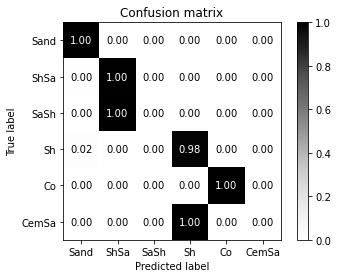

In [56]:
clf_GB = ensemble.GradientBoostingClassifier(**params)
clf_GB.fit(X1_train, y1_train)
preds_GB = clf_GB.predict(X1_test)

print(classification_report(y1_test, preds_GB))
cm_test_GB = confusion_matrix(y1_test, preds_GB)
plot_confusion_matrix(cm_test_GB, training_features, normalize=True)

In [57]:
microF1_test_gb = f1_score(y1_test, preds_GB, average='micro')
print('Test Micro f1 score:', microF1_test_gb)

Test Micro f1 score: 0.9941381205348965


              precision    recall  f1-score   support

        Sand       0.98      1.00      0.99       105
      ShSand       1.00      1.00      1.00        74
          Sh       1.00      0.97      0.99        68
          Co       1.00      1.00      1.00        14

    accuracy                           0.99       261
   macro avg       1.00      0.99      0.99       261
weighted avg       0.99      0.99      0.99       261

Normalized confusion matrix


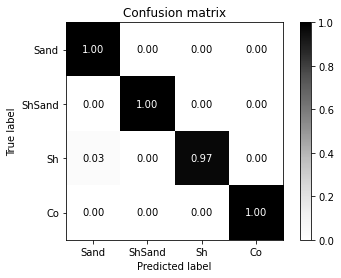

In [58]:
pred_GB_blind = clf_GB.predict(X_blind[k])
print(classification_report(y_blind[k], pred_GB_blind, target_names = blind_class[k]))
cm_GB = confusion_matrix(y_blind[k], pred_GB_blind)
plot_confusion_matrix(cm_GB, blind_class[k], normalize=True)

In [59]:
for i_well in range(0,10):
    

    aux_pred_GB_blinda = clf_GB.predict(X_blind[i_well])

    microF1_blind_GB = f1_score(y_blind[i_well], aux_pred_GB_blinda, average='micro')
    
    print('Blind micro f1 score:', microF1_blind_GB)

Blind micro f1 score: 0.9923371647509579
Blind micro f1 score: 0.9956616052060737
Blind micro f1 score: 0.9766899766899767
Blind micro f1 score: 0.9665653495440729
Blind micro f1 score: 0.9769585253456222
Blind micro f1 score: 0.9585798816568046
Blind micro f1 score: 1.0
Blind micro f1 score: 0.9955947136563876
Blind micro f1 score: 0.993103448275862
Blind micro f1 score: 0.9923371647509579


### 9.3. Random forest (RF) parameter optimization

In [60]:
# max_depths = [2, 3, 4]
# n_estimators_list = [100, 500, 1000, 2000, 5000]

# i = 0
# plt.figure(figsize=(15,5))

# for depth in max_depths:
    
#     i = i + 1
#     scores = list()
#     score_tests = list()
    
#     for est in n_estimators_list:
#         params = {'n_estimators': est, ##  number of iterations, int, default=100
#                   'max_depth': depth, ##  int, default=None
#                   'n_jobs': -1 #to speed up computations by taking advantage of parallel processing.
                  
#                   }
#         clf_cv = ensemble.RandomForestClassifier(**params)
#         clf_cv.fit(X1_train, y1_train)
#         cv_score = clf_cv.score(X1_train, y1_train)
#         scores.append(np.mean(cv_score))
#         score_test = clf_cv.score(X1_test, y1_test)
#         score_tests.append(score_test)
        
#     plt.subplot(1,4,i)
#     plt.plot(n_estimators_list, scores, color='b', label='Train')
#     plt.plot(n_estimators_list, score_tests, color='r', label='Test')
#     plt.legend()
#     plt.title('max depth = {}'.format(depth))
#     plt.xlabel('n_estimators')
#     plt.ylabel('Accuracy')
#     plt.ylim(0,1.1)

# scores = list()
# score_tests = list()

# for est in n_estimators_list:
    
#     clf_cv = ensemble.RandomForestClassifier(n_estimators=est)
#     clf_cv.fit(X1_train, y1_train)
#     cv_score = clf_cv.score(X1_train, y1_train)
#     scores.append(np.mean(cv_score))
#     score_test = clf_cv.score(X1_test, y1_test)
#     score_tests.append(score_test)
    
# plt.subplot(1,4,4)
# plt.plot(n_estimators_list, scores, color='b', label='Train')
# plt.plot(n_estimators_list, score_tests, color='r', label='Test')
# plt.legend()
# plt.title('max depth = {}'.format('None'))
# plt.xlabel('n_estimators')
# plt.ylabel('Accuracy')
# plt.ylim(0,1.1)

# plt.savefig('canada_parameter_rf_max_depth.pdf',bbox_inches='tight')
# plt.show()

Max_depth = 3, and n_estimator = 100 gives best accuracy.

Random forest classifier training

[0.99489796 0.99568119 0.98311739 0.99096977 0.98311739]


/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.99      1.00      1.00      2163
           2       1.00      0.98      0.99      1202
           3       0.00      0.00      0.00         7
           4       0.99      0.90      0.94       940
           5       0.91      1.00      0.95      1146
           6       0.00      0.00      0.00         1

    accuracy                           0.98      5459
   macro avg       0.65      0.65      0.65      5459
weighted avg       0.98      0.98      0.98      5459

Normalized confusion matrix


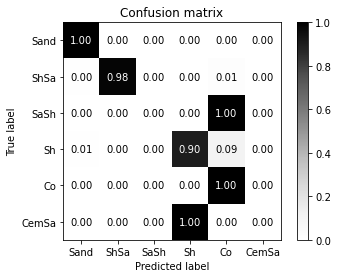

In [61]:
clf_RF = ensemble.RandomForestClassifier(max_depth=3, n_estimators=100, criterion='entropy')
print(cross_val_score(clf_RF, X1_train, y1_train, cv=5))
clf_RF.fit(X1_train, y1_train)
preds_RF = clf_RF.predict(X1_test)
print(classification_report(y1_test, preds_RF))
cm_test_RF = confusion_matrix(y1_test, preds_RF)
plot_confusion_matrix(cm_test_RF, training_features, normalize=True)

In [62]:
microF1_test_rf = f1_score(y1_test, preds_RF, average='micro')
print('Test Macro f1 score:', microF1_test_rf)

Test Macro f1 score: 0.975819747206448


Random forest blind predction

              precision    recall  f1-score   support

        Sand       1.00      0.99      1.00       105
      ShSand       1.00      0.91      0.95        74
          Sh       0.96      0.38      0.55        68
          Co       0.22      1.00      0.36        14

    accuracy                           0.81       261
   macro avg       0.80      0.82      0.71       261
weighted avg       0.95      0.81      0.83       261

Normalized confusion matrix


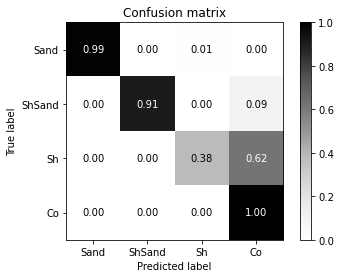

In [63]:
pred_RF_blind = clf_RF.predict(X_blind[k])
print(classification_report(y_blind[k], pred_RF_blind, target_names = blind_class[k]))
cm_RF = confusion_matrix(y_blind[k], pred_RF_blind)
plot_confusion_matrix(cm_RF, blind_class[k], normalize=True)

In [64]:
for i_well in range(0,10):
    
    aux_pred_RF_blind = clf_RF.predict(X_blind[i_well])
    microF1_blind_rf = f1_score(y_blind[i_well], aux_pred_RF_blind, average='micro')
    print('Test Micro f1 score:', microF1_blind_rf)

Test Micro f1 score: 0.9348659003831418
Test Micro f1 score: 0.9370932754880694
Test Micro f1 score: 0.9603729603729604
Test Micro f1 score: 0.993920972644377
Test Micro f1 score: 0.9769585253456222
Test Micro f1 score: 0.8994082840236687
Test Micro f1 score: 1.0
Test Micro f1 score: 0.9911894273127754
Test Micro f1 score: 0.9724137931034482
Test Micro f1 score: 0.8084291187739464


### 9.4. KNN Parameter optimzation

In [65]:
# neighbor_list = [1, 3, 5, 7, 10]
# weight_list = ['uniform', 'distance']
# i=0

# for weight in weight_list:
    
    
#     scores = list()
#     score_tests = list()
#     i = i + 1
    
#     for neighbor in neighbor_list:
#         clf_cv = KNeighborsClassifier(n_neighbors=neighbor, weights=weight)
#         clf_cv.fit(X1_train, y1_train)
#         scores.append(clf_cv.score(X1_train, y1_train))
#         score_tests.append(clf_cv.score(X1_test, y1_test))
#         print(scores)
        
#     plt.subplot(1,2,i)
#     plt.plot(neighbor_list, scores, '-b', label = 'Train')
#     plt.plot(neighbor_list, score_tests, '-r', label = 'Test')
#     plt.title('Weight = {}'.format(weight))
#     plt.xlabel('K')
#     plt.ylabel('Accuracy')
#     plt.ylim(0,1.1)
# plt.savefig('canada_parameter_knn.pdf',bbox_inches='tight')    
# plt.show()

Using weight has a better KNN modeling score.

KNN classifer training

In [66]:
clf_knn = KNeighborsClassifier(n_neighbors=8, weights='uniform')
print(cross_val_score(clf_knn, X1_train, y1_train, cv=5))

[0.96153846 0.95484884 0.96152336 0.95563408 0.96309384]


/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.98      0.99      0.98      2163
           2       0.95      0.95      0.95      1202
           3       0.00      0.00      0.00         7
           4       0.94      0.93      0.94       940
           5       0.99      0.98      0.98      1146
           6       0.00      0.00      0.00         1

    accuracy                           0.97      5459
   macro avg       0.64      0.64      0.64      5459
weighted avg       0.97      0.97      0.97      5459

Normalized confusion matrix


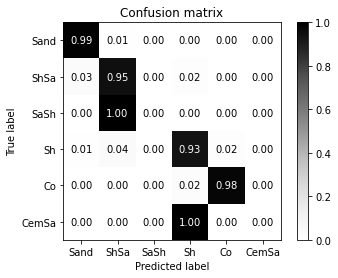

In [67]:
clf_knn = KNeighborsClassifier(n_neighbors=8, weights='uniform')
clf_knn.fit(X1_train, y1_train)
preds_knn = clf_knn.predict(X1_test)
print(classification_report(y1_test, preds_knn))
cm_test_knn = confusion_matrix(y1_test, preds_knn)
plot_confusion_matrix(cm_test_knn, training_features, normalize=True)

In [68]:
microF1_test_knn = f1_score(y1_test, preds_knn, average='micro')
print('Test Macro f1 score:', microF1_test_knn)

Test Macro f1 score: 0.9668437442755083


KNN blind well prediction

              precision    recall  f1-score   support

           1       1.00      0.80      0.89       105
           2       0.77      0.91      0.83        74
           4       0.88      1.00      0.94        68
           5       1.00      0.93      0.96        14

    accuracy                           0.89       261
   macro avg       0.91      0.91      0.91       261
weighted avg       0.90      0.89      0.89       261

Normalized confusion matrix


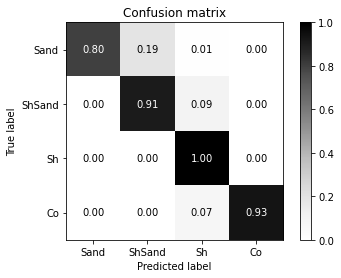

In [69]:
preds_knn_blind = clf_knn.predict(X_blind[k])
print(classification_report(y_blind[k], preds_knn_blind))
cm_knn = confusion_matrix(y_blind[k], preds_knn_blind)
plot_confusion_matrix(cm_knn, blind_class[k], normalize=True)

In [70]:
for i_well in range(0,10):
    
    aux_preds_knn_blind = clf_knn.predict(X_blind[i_well])
    microF1_blind_knn = f1_score(y_blind[i_well], aux_preds_knn_blind, average='micro')
    print('Test Macro f1 score:', microF1_blind_knn)

Test Macro f1 score: 0.9578544061302682
Test Macro f1 score: 0.9327548806941431
Test Macro f1 score: 0.9440559440559441
Test Macro f1 score: 0.9483282674772037
Test Macro f1 score: 0.9769585253456222
Test Macro f1 score: 0.9467455621301775
Test Macro f1 score: 0.9646464646464646
Test Macro f1 score: 0.9691629955947137
Test Macro f1 score: 0.9310344827586207
Test Macro f1 score: 0.8888888888888888


### 9.5 CNN

In [71]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd


import folium
import numpy as np

print(tf.__version__)

2.4.1


In [72]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mae']), label='Train')
    plt.plot(history.epoch, np.array(history.history['val_mae']),label = 'Val')
    plt.legend()
    plt.ylim([0,max(history.history['val_mae'])])

def plot_prediction(test_labels, test_predictions):
    plt.figure()
    plt.scatter(test_labels, test_predictions)
    plt.xlabel('True Values [1000$]')
    plt.ylabel('Predictions [1000$]')
    plt.axis('equal')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    _ = plt.plot([-100, 100],[-100,100])

    plt.figure()
    error = test_predictions - test_labels
    plt.hist(error, bins = 50)
    plt.xlabel("Prediction Error [1000$]")
    _ = plt.ylabel("Count")

#### Create the Conv1D model

Let's build an Conv1D model. Here, we'll use a `Sequential` model with 3 Conv1D layers, one MaxPooling1D layer, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, `build_model` as we did above.

#### Reshape Data sets
As you might remember, Conv1D layer expects input shape in 3D as

  `[batch_size, time_steps, input_dimension]`

However, current data is in the shape of

`[batch_size, features]`

See below:

In [73]:
print(X_train.shape)
print(X_train[1].shape)
print(X_train[0])

(9097, 5)
(5,)
[-1.37726108 -1.14421457  1.1022235   0.18440999  1.07064893]


In [74]:
sample_size = X_train.shape[0] # number of samples in train set
time_steps  = X_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = X_train.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", train_data_reshaped.shape)
print("1 Sample shape:\n",train_data_reshaped[0].shape)
print("An example sample:\n", train_data_reshaped[0])

After reshape train data set shape:
 (9097, 5, 1)
1 Sample shape:
 (5, 1)
An example sample:
 [[-1.37726108]
 [-1.14421457]
 [ 1.1022235 ]
 [ 0.18440999]
 [ 1.07064893]]


In [75]:
test_data_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [76]:
test_data_reshaped.shape

(9098, 5, 1)

In [77]:
def build_conv1D_model():

    n_timesteps = train_data_reshaped.shape[1] #5
    n_features  = train_data_reshaped.shape[2] #1 
       
    
    model = keras.Sequential(name="model_conv1D")
    
    # 1st layer
    model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
    model.add(keras.layers.Conv1D(filters=200, kernel_size=2, strides=1, padding='valid', activation='relu', name="Conv1D_1"))
    model.add(keras.layers.MaxPooling1D(pool_size=1))
    model.add(keras.layers.Conv1D(filters=200, kernel_size=2, strides=1, padding='valid', activation='relu', name="Conv1D_2"))
    model.add(keras.layers.MaxPooling1D(pool_size=1))
    model.add(keras.layers.Conv1D(filters=200, kernel_size=2, strides=1, padding='valid', activation='relu', name="Conv1D_3"))
    model.add(keras.layers.MaxPooling1D(pool_size=1))
    model.add(keras.layers.Conv1D(filters=200, kernel_size=2, strides=1, padding='valid', activation='relu', name="Conv1D_4"))
    model.add(keras.layers.MaxPooling1D(pool_size=1))
    #model.add(keras.layers.MaxPooling1D(pool_size=1, name="MaxPooling1D_fisrt"))
    
    # Dense
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(7, activation='softmax'))


    optimizer_aux = tf.keras.optimizers.Adam()
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer_aux ,metrics = ['accuracy'])
    
    return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()


2022-10-27 20:26:52.552905: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-27 20:26:52.658392: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 20:26:52.697247: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 4, 200)            600       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 200)            0         
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 3, 200)            80200     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 200)            0         
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 2, 200)            80200     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 200)            0         
_________________________________________________________________
Conv1D_4 (Conv1D)            (None, 1, 200)           

In [78]:
earlystoping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                patience=5,
                                                verbose=1,
                                                mode='auto',
                                                restore_best_weights=True)
checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                      save_weights_only=True,
                                                      monitor='val_accuracy',
                                                      mode='max',
                                                      verbose=1,
                                                      save_best_only=True)

In [79]:
history_cnn = model_conv1D.fit(train_data_reshaped, y_train, validation_data = (test_data_reshaped,y_test),
                           batch_size = 512, 
                           callbacks = [model_checkpoint,earlystoping],
                           epochs = 1000,
                           verbose=1)

2022-10-27 20:26:53.894793: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-27 20:26:54.024795: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3493395000 Hz


Epoch 1/1000
18/18 [==============================] - 7s 251ms/step - loss: 1.7483 - accuracy: 0.4873 - val_loss: 0.8438 - val_accuracy: 0.6016

Epoch 00001: val_accuracy improved from -inf to 0.60156, saving model to weights.01-0.84.h5
Epoch 2/1000
18/18 [==============================] - 4s 205ms/step - loss: 0.6992 - accuracy: 0.6695 - val_loss: 0.3774 - val_accuracy: 0.8571

Epoch 00002: val_accuracy improved from 0.60156 to 0.85711, saving model to weights.02-0.38.h5
Epoch 3/1000
18/18 [==============================] - 4s 207ms/step - loss: 0.3704 - accuracy: 0.8669 - val_loss: 0.2033 - val_accuracy: 0.9271

Epoch 00003: val_accuracy improved from 0.85711 to 0.92713, saving model to weights.03-0.20.h5
Epoch 4/1000
18/18 [==============================] - 3s 179ms/step - loss: 0.2180 - accuracy: 0.9245 - val_loss: 0.1594 - val_accuracy: 0.9370

Epoch 00004: val_accuracy improved from 0.92713 to 0.93702, saving model to weights.04-0.16.h5
Epoch 5/1000
18/18 [=======================

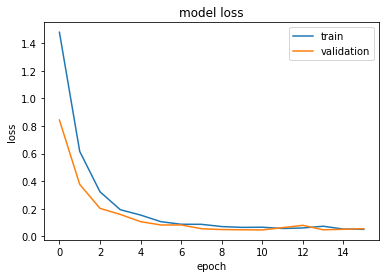

In [80]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])


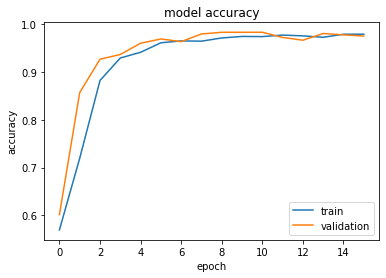

In [81]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [82]:
pred_test_cnn = model_conv1D.predict(test_data_reshaped)

In [83]:
pred_test_cnn = tf.argmax(pred_test_cnn, axis=1)

In [84]:
test_loss, test_acc = model_conv1D.evaluate(test_data_reshaped,  y_test, verbose=2)

285/285 - 2s - loss: 0.0470 - accuracy: 0.9836


              precision    recall  f1-score   support

        Sand       0.99      1.00      0.99      3542
        ShSa       0.97      0.99      0.98      2015
        SaSh       0.00      0.00      0.00        14
          Sh       0.97      0.97      0.97      1592
          Co       1.00      0.98      0.99      1933
       CemSa       0.00      0.00      0.00         2

    accuracy                           0.98      9098
   macro avg       0.65      0.65      0.65      9098
weighted avg       0.98      0.98      0.98      9098

Normalized confusion matrix


/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


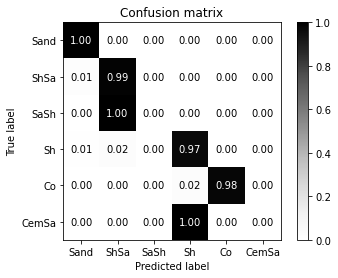

In [85]:
print(classification_report(y_test, pred_test_cnn, target_names=training_features))
cm_test_cnn = confusion_matrix(y_test, pred_test_cnn)
plot_confusion_matrix(cm_test_cnn, training_features, normalize=True)

In [86]:
microF1_test_cnn = f1_score(y_test, pred_test_cnn, average='micro')
print('Test Macro f1 score:', microF1_test_cnn)

Test Macro f1 score: 0.9836227742360959


Applied CNN to Blind well

In [87]:
X_blind_reshaped = X_blind_stnd[k].reshape(X_blind_stnd[k].shape[0],X_blind_stnd[k].shape[1],1)
X_blind_reshaped.shape

(261, 5, 1)

In [88]:
aux_cnn = model_conv1D.predict(X_blind_reshaped)
pred_blind_cnn_index = tf.argmax(aux_cnn, axis=1)

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       105
           2       0.99      0.97      0.98        74
           4       0.99      0.97      0.98        68
           5       1.00      1.00      1.00        14

    accuracy                           0.98       261
   macro avg       0.98      0.98      0.98       261
weighted avg       0.98      0.98      0.98       261

Normalized confusion matrix


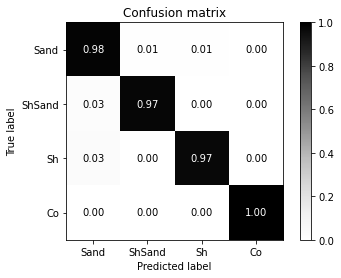

In [89]:
print(classification_report(y_blind[k], pred_blind_cnn_index))
cm_blind_cnn = confusion_matrix(y_blind[k], pred_blind_cnn_index)
plot_confusion_matrix(cm_blind_cnn, blind_class[k], normalize=True)

In [90]:
for i_well in range(0,10):
    aux_X_blind_reshaped = X_blind_stnd[i_well].reshape(X_blind_stnd[i_well].shape[0],X_blind_stnd[i_well].shape[1],1)
    
    aux_cnn = model_conv1D.predict(aux_X_blind_reshaped)
    aux_pred_blind_cnn_index = tf.argmax(aux_cnn, axis=1)

    microF1_blind_cnn = f1_score(y_blind[i_well], aux_pred_blind_cnn_index, average='micro')
    print('Test Macro f1 score:', microF1_blind_cnn)

Test Macro f1 score: 0.9885057471264368
Test Macro f1 score: 0.9891540130151844
Test Macro f1 score: 0.9603729603729604
Test Macro f1 score: 0.9817629179331308
Test Macro f1 score: 0.9723502304147466
Test Macro f1 score: 0.9585798816568046
Test Macro f1 score: 1.0
Test Macro f1 score: 0.9911894273127754
Test Macro f1 score: 0.9655172413793104
Test Macro f1 score: 0.9770114942528736


### 9.6 CNN (RBF)

In [91]:
import keras
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, ** kwargs):
        super(RBFLayer, self).__init__( ** kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name = 'mu',
                                  shape = (int(input_shape[1]), self.units),
                                  initializer = 'uniform',
                                  trainable = True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis = 1)
        res = K.exp(-1 * self.gamma * l2)
        return res
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [92]:
def build_conv1D_rbf_model():

    n_timesteps = train_data_reshaped.shape[1] #5
    n_features  = train_data_reshaped.shape[2] #1 
       
    
    model_cnn_rbf = keras.Sequential(name="model_conv1D_rbf")
    
    # 1st layer
    model_cnn_rbf.add(keras.layers.Input(shape=(n_timesteps,n_features)))
    
    model_cnn_rbf.add(keras.layers.Conv1D(filters=200, kernel_size=2, strides=1, padding='valid', activation='relu', name="Conv1D_1"))
    model_cnn_rbf.add(keras.layers.MaxPooling1D(pool_size=1))
    
    model_cnn_rbf.add(keras.layers.Conv1D(filters=200, kernel_size=2, strides=1, padding='valid', activation='relu', name="Conv1D_2"))
    model_cnn_rbf.add(keras.layers.MaxPooling1D(pool_size=1))
    
    model_cnn_rbf.add(keras.layers.Conv1D(filters=200, kernel_size=2, strides=1, padding='valid', activation='relu', name="Conv1D_3"))
    model_cnn_rbf.add(keras.layers.MaxPooling1D(pool_size=1))
    
    model_cnn_rbf.add(keras.layers.Conv1D(filters=200, kernel_size=2, strides=1, padding='valid', activation=RBFLayer(10, 10), name="Conv1D_4"))
    model_cnn_rbf.add(keras.layers.MaxPooling1D(pool_size=1))
    
    # Dense
    
    model_cnn_rbf.add(keras.layers.Flatten())
    model_cnn_rbf.add(keras.layers.Dropout(0.2))
    model_cnn_rbf.add(keras.layers.Dense(50, activation='relu'))
    model_cnn_rbf.add(keras.layers.Dense(50, activation='relu'))
    model_cnn_rbf.add(keras.layers.Dense(50, activation='relu'))
    model_cnn_rbf.add(keras.layers.Dense(7, activation='softmax'))


    optimizer_aux = tf.keras.optimizers.Adam()
    model_cnn_rbf.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer_aux ,metrics = ['accuracy'])
    
    return model_cnn_rbf

model_conv1D_rbf = build_conv1D_rbf_model()
model_conv1D_rbf.summary()


Model: "model_conv1D_rbf"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 4, 200)            600       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 4, 200)            0         
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 3, 200)            80200     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 3, 200)            0         
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 2, 200)            80200     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 2, 200)            0         
_________________________________________________________________
Conv1D_4 (Conv1D)            (None, 200, 10)      

In [93]:
earlystoping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                patience=5,
                                                verbose=1,
                                                mode='auto',
                                                restore_best_weights=True)
checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                      save_weights_only=True,
                                                      monitor='val_accuracy',
                                                      mode='max',
                                                      verbose=1,
                                                      save_best_only=True)

In [ ]:
history_cnn_rbf = model_conv1D_rbf.fit(train_data_reshaped, y_train, validation_data = (test_data_reshaped,y_test),
                                       batch_size = 512, 
                                       callbacks = [model_checkpoint,earlystoping],
                                       epochs = 1000,
                                       verbose=1)

Epoch 1/1000
18/18 [==============================] - 6s 266ms/step - loss: 1.3468 - accuracy: 0.4610 - val_loss: 0.3796 - val_accuracy: 0.8817

Epoch 00001: val_accuracy improved from -inf to 0.88173, saving model to weights.01-0.38.h5
Epoch 2/1000
18/18 [==============================] - 5s 271ms/step - loss: 0.2810 - accuracy: 0.9155 - val_loss: 0.1061 - val_accuracy: 0.9718

Epoch 00002: val_accuracy improved from 0.88173 to 0.97175, saving model to weights.02-0.11.h5
Epoch 3/1000
18/18 [==============================] - 4s 235ms/step - loss: 0.1084 - accuracy: 0.9619 - val_loss: 0.0818 - val_accuracy: 0.9688

Epoch 00003: val_accuracy did not improve from 0.97175
Epoch 4/1000
18/18 [==============================] - 5s 255ms/step - loss: 0.0748 - accuracy: 0.9741 - val_loss: 0.0662 - val_accuracy: 0.9755

Epoch 00004: val_accuracy improved from 0.97175 to 0.97549, saving model to weights.04-0.07.h5
Epoch 5/1000
18/18 [==============================] - 5s 251ms/step - loss: 0.0708 

In [ ]:
plt.plot(history_cnn_rbf.history['loss'])
plt.plot(history_cnn_rbf.history['val_loss'])
plt.title('Model loss (CNN-RBF)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

In [ ]:
plt.plot(history_cnn_rbf.history['accuracy'])
plt.plot(history_cnn_rbf.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
pred_test_cnn_rbf = model_conv1D_rbf.predict(test_data_reshaped)

In [ ]:
pred_test_cnn_rbf = tf.argmax(pred_test_cnn_rbf, axis=1)

In [ ]:
test_loss_rbf, test_acc_rbf = model_conv1D_rbf.evaluate(test_data_reshaped,  y_test, verbose=2)

In [ ]:
print(classification_report(y_test, pred_test_cnn_rbf, target_names=training_features))
cm_test_rbf = confusion_matrix(y_test, pred_test_cnn_rbf)
plot_confusion_matrix(cm_test_rbf, training_features, normalize=True)

In [ ]:
microF1_test_rbf = f1_score(y_test, pred_test_cnn_rbf, average='micro')
print('Test Macro f1 score:', microF1_test_rbf)

In [ ]:
aux_cnn_rbf = model_conv1D_rbf.predict(X_blind_reshaped)
pred_blind_cnn_rbf_index = tf.argmax(aux_cnn_rbf, axis=1)

In [ ]:
print(classification_report(y_blind[k], pred_blind_cnn_rbf_index))
cm_blind_rbf = confusion_matrix(y_blind[k], pred_blind_cnn_rbf_index)
plot_confusion_matrix(cm_blind_rbf, blind_class[k], normalize=True)

### 9.7. MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(random_state=42, hidden_layer_sizes=(50,50)).fit(X_train, y_train)

In [ ]:
pred_mlp_test = mlp.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_mlp_test, target_names=training_features))
cm_test_MLP = confusion_matrix(y_test, pred_mlp_test)
plot_confusion_matrix(cm_test_MLP, training_features, normalize=True)

In [ ]:
microF1_test_mlp = f1_score(y_test, pred_mlp_test, average='micro')
print('Test Macro f1 score:', microF1_test_mlp)

In [ ]:
pred_mlp_blind = mlp.predict(X_blind_stnd[k])
print(classification_report(y_blind[k], pred_mlp_blind))
cm_blind_mlp = confusion_matrix(y_blind[k], pred_mlp_blind)
plot_confusion_matrix(cm_blind_mlp, blind_class[k], normalize=True)

# 10. Model performance evaluation

I will use the diagnosis of confusion matrix from train data set to evaluate the model performance. The diagnosis of confusion matrix points how much percentage of the stone is correctly predicted.

In [ ]:
### To create a data frame recording the correct prediction (normalized) of 
### facies for each machine learning algorithm

mod_test_list = ['SVM', 'GB', 'RF','KNN','CNN','CNN-RBF','MLP']
cm_test_list = [cm_test_SVM, cm_test_GB, cm_test_RF, cm_test_knn,cm_test_cnn, cm_test_rbf, cm_test_MLP]
face_test_list = training_features
pred_test_df = pd.DataFrame(index=training_features, columns=mod_test_list)

for mod in mod_test_list:
    
    col_index = int(mod_test_list.index(mod))
    cm = cm_test_list[col_index]
    
    for face in face_test_list:
        row_index = training_features.index(face)
        #print(face, row_index, col_index)
        pred_test_df.iloc[row_index, col_index] = cm[row_index][row_index]/sum(cm[row_index])
        

### add the accuracy factor
df_1 = pd.DataFrame([[microF1_test_SVM, 
                      microF1_test_gb, 
                      microF1_test_rf, 
                      microF1_test_knn, 
                      microF1_test_cnn, 
                      microF1_test_rbf, 
                      microF1_test_mlp]], index=['Accuracy'], columns=mod_test_list)    


pred_test_conc = pd.concat([pred_test_df,df_1])
pred_test_conc

In [ ]:
X_ind = np.arange(pred_test_df.shape[0])
(pred_df_index_list) = training_features
aux=0.1
plt.figure(figsize=(10,5))
plt.bar(X_ind, pred_test_df['SVM'], color='k', width=aux)
plt.bar(X_ind+0.1, pred_test_df['GB'], color='yellow', width=aux)
plt.bar(X_ind+0.2, pred_test_df['RF'], color='darkgreen', width=aux)
plt.bar(X_ind+0.3, pred_test_df['KNN'], color='orange', width=aux)
plt.bar(X_ind+0.4, pred_test_df['CNN'], color='blue', width=aux)
plt.bar(X_ind+0.5, pred_test_df['CNN-RBF'], color='red', width=aux)
plt.bar(X_ind+0.6, pred_test_df['MLP'], color='lime', width=aux)
plt.xticks(X_ind, pred_df_index_list)
plt.xlabel('Facies')
plt.ylabel('Correct predictions')
plt.legend(labels=mod_test_list)
plt.savefig('canada_performance_evaluation_test_data.pdf',bbox_inches='tight')
plt.show()

# 11. Calssifier evluation using blind test well

I will use the same method shown in item4 for evaluation.

In [ ]:
### To create a data frame recording the correct prediction (normalized) of facies of blind test well for each machine learning algorithm

mod_list = ['SVM', 'GB', 'RF','KNN','CNN','CNN-RBF','MLP']
cm_list = [cm_SVM, cm_GB, cm_RF, cm_knn, cm_blind_cnn, cm_blind_rbf, cm_blind_mlp]
pred_df = pd.DataFrame(index=blind_class[k], columns=mod_list)

for mod in mod_list:
    col_index = int(mod_list.index(mod))
    cm = cm_list[col_index]
    
    for face in blind_class[k]:
        
        row_index = blind_class[k].index(face)
        #print(face, row_index, col_index)
        pred_df.iloc[row_index, col_index] = cm[row_index][row_index]/sum(cm[row_index])



In [ ]:
### add the accuracy factor and percentage of most correct prediction
#df_2 = pd.DataFrame([[microF1_blind_SVM, 
#                      microF1_blind_GB, 
#                      microF1_blind_rf, 
#                      microF1_blind_knn, 
#                      microF1_blind_cnn]], index=['Accuracy'], columns=mod_list)

#pred_blind_conc = pd.concat([pred_df,df_2])
#pred_blind_conc

In [ ]:
X_ind = np.arange(pred_df.shape[0])

aux=0.1
plt.figure(figsize=(10,5))
plt.bar(X_ind, pred_df['SVM'], color='k', width=aux)
plt.bar(X_ind+0.1, pred_df['GB'], color='yellow', width=aux)
plt.bar(X_ind+0.2, pred_df['RF'], color='darkgreen', width=aux)
plt.bar(X_ind+0.3, pred_df['KNN'], color='orange', width=aux)
plt.bar(X_ind+0.4, pred_df['CNN'], color='blue', width=aux)
plt.bar(X_ind+0.5, pred_df['CNN-RBF'], color='red', width=aux)
plt.bar(X_ind+0.6, pred_df['MLP'], color='lime', width=aux)
plt.xticks(X_ind, blind_class[k])
plt.xlabel('Facies')
plt.ylabel('Correct predictions')
plt.legend(labels=mod_list)
plt.savefig('canada_performance_evaluation_blind_data.pdf',bbox_inches='tight')
plt.show()

# 12. Plot the predicted facies for comparison**

In [ ]:
blind = blind_data_sep[k].copy()
blind['SVM'] = pred_blind
blind['GB'] = pred_GB_blind
blind['RF'] = pred_RF_blind
blind['KNN'] = preds_knn_blind
blind['CNN'] = pred_blind_cnn_index
blind['CNN-RBF'] = pred_blind_cnn_rbf_index
blind['MLP'] = pred_mlp_blind

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


facies_colors = ['b','g','r','c','m']


def compare_facies_plot(logs, compare1, compare2, compare3, compare4, compare5, compare6, compare7, facies_colors):
      #make sure logs are sorted by depth
    logs = logs.sort_values(by='DEPTH')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    num_colors = 5
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    
    cluster0 = np.repeat(np.expand_dims(logs['LITH_SI'].values,1), 100, 1)
    cluster1 = np.repeat(np.expand_dims(logs[compare1].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compare2].values,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs[compare3].values,1), 100, 1)
    cluster4 = np.repeat(np.expand_dims(logs[compare4].values,1), 100, 1)
    cluster5 = np.repeat(np.expand_dims(logs[compare5].values,1), 100, 1)
    cluster6 = np.repeat(np.expand_dims(logs[compare6].values,1), 100, 1)
    cluster7 = np.repeat(np.expand_dims(logs[compare7].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=13, figsize=(15, 12))
    ax[0].plot(logs.SW, logs.DEPTH, '-g')
    ax[1].plot(logs.VSH, logs.DEPTH, '-')
    ax[2].plot(logs.PHI, logs.DEPTH, '-', color='0.5')
    ax[3].plot(logs.RW, logs.DEPTH, '-', color='r')
    ax[4].plot(logs.W_TAR, logs.DEPTH, '-', color='black')
    im0 = ax[5].imshow(cluster0, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im1 = ax[6].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im2 = ax[7].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im3 = ax[8].imshow(cluster3, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im4 = ax[9].imshow(cluster4, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im4 = ax[10].imshow(cluster5, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im4 = ax[11].imshow(cluster6, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im4 = ax[12].imshow(cluster7, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    
            
    divider = make_axes_locatable(ax[12])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im4, cax=cax)
    cbar.set_label((30*' ').join(blind_class[k]))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-8):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("SW")
    ax[0].set_xlim(logs.SW.min(),logs.SW.max())
    ax[1].set_xlabel("VSH")
    ax[1].set_xlim(logs.VSH.min(),logs.VSH.max())
    ax[2].set_xlabel("PHI")
    ax[2].set_xlim(logs.PHI.min(),logs.PHI.max())
    ax[3].set_xlabel("RW")
    ax[3].set_xlim(logs.RW.min(),logs.RW.max())
    ax[4].set_xlabel("W_TAR")
    ax[4].set_xlim(logs.W_TAR.min(),logs.W_TAR.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compare1)
    ax[7].set_xlabel(compare2)
    ax[8].set_xlabel(compare3)
    ax[9].set_xlabel(compare4)
    ax[10].set_xlabel(compare5)
    ax[11].set_xlabel(compare6)
    ax[12].set_xlabel(compare7)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([]); ax[8].set_yticklabels([]); ax[9].set_yticklabels([])
    ax[10].set_yticklabels([]); ax[11].set_yticklabels([]); ax[12].set_yticklabels([])
    
    
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    ax[7].set_xticklabels([])
    ax[8].set_xticklabels([])
    ax[9].set_xticklabels([])
    ax[10].set_xticklabels([])
    ax[11].set_xticklabels([])
    ax[12].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)

In [ ]:
compare_facies_plot(blind, 
                    'SVM', 
                    'GB', 
                    'RF', 
                    'KNN',
                    'CNN', 
                    'CNN-RBF', 
                    'MLP',facies_colors)

In [ ]:
blind['LITH_SI']